In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_2.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_7.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_5.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_10.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_1.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_8.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_3.JPG
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_6.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_9.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/I

In [19]:
import gc
import cv2 as cv
import cv2
from PIL import Image

In [20]:
cats = os.listdir('/kaggle/input/fruit-and-vegetable-image-recognition/train')
path = '/kaggle/input/fruit-and-vegetable-image-recognition/'

In [21]:
len(cats)

36

In [22]:
def load_dataset(dataset_name, path_name):
    """
    Load images from a dataset stored in a specific directory structure.

    Args:
        dataset_name (str): Name of the dataset directory.
        path_name (str): Path to the root directory containing the dataset.

    Returns:
        list: A list of image data and their corresponding labels.
    """
    # Set the path to the dataset
    dataset_path = path_name
    
    # Initialize an empty list to store image data and labels
    data = []
    
    # Define the target width and height for resizing images
    target_width = 224
    target_height = 224
    
    # Iterate over categories (assumed to be predefined)
    for category in os.listdir(dataset_path):
        category_path = os.path.join(dataset_path, category)
        
        # Iterate over images in the current category
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            
            # Skip specific images (e.g., Image_56.jpg and Image_96.jpg)
            if image_name in ['Image_56.jpg', 'Image_96.jpg']:
                continue
            
            # Read the image using OpenCV
            image = cv2.imread(image_path)
            
            # Convert the image to RGB format using PIL
            image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            
            # Resize the image
            resized_image = image_pil.resize((target_width, target_height))
            
            # Append the resized image data and its label to the list
            data.append([np.array(resized_image), category])
    
    return data

In [23]:
# Assuming 'path' is the variable containing the path to dataset
# 'train' will contain the loaded training data
train = load_dataset('train', path)


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

In [24]:
# Assuming 'path' is the variable containing the path to dataset
# 'test' will contain the loaded test data
test = load_dataset('test', path)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [26]:
import torch
net = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)
for params in net.parameters():
    params.requires_grad = False
net.eval()


Downloading: "https://github.com/pytorch/vision/zipball/v0.6.0" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 233M/233M [00:01<00:00, 228MB/s] 


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [27]:
# Modify the second-to-last layer of the classifier
net.classifier[-3] = torch.nn.Linear(in_features=4096, out_features=4096, bias=True)

# Modify the last layer of the classifier
net.classifier[-1] = torch.nn.Linear(in_features=4096, out_features=36, bias=True)

# Append a new fully connected layer followed by softmax activation
net = torch.nn.Sequential(net, torch.nn.Linear(in_features=36, out_features=36, bias=True), torch.nn.Softmax(dim=1))


In [28]:
import torch
import torchvision.transforms as transforms

# Define transformations for data augmentation and normalization for the training set
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  # Randomly crop the image to size 32x32 with padding of 4 pixels
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.507, 0.487, 0.441], std=[0.267, 0.256, 0.276])  # Normalize the image with predefined mean and standard deviation
])

# Define transformations for normalization for the test set (no augmentation)
transform_test = transforms.Compose([
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.507, 0.487, 0.441], std=[0.267, 0.256, 0.276])  # Normalize the image with predefined mean and standard deviation
])

# Define the batch size for training
batch_size = 16


In [29]:
from torch.utils.data import Dataset, DataLoader

class ImageDataset(Dataset):
    """Custom dataset for image data."""
    def __init__(self, dataset):
        """
        Initialize the ImageDataset class.

        Args:
            dataset (list): List containing image data and labels.
        """
        self.dataset = dataset
    
    def __len__(self):
        """
        Get the number of samples in the dataset.

        Returns:
            int: Number of samples in the dataset.
        """
        return len(self.dataset)
    
    def __getitem__(self, idx):
        """
        Get a sample from the dataset at the given index.

        Args:
            idx (int): Index of the sample to retrieve.

        Returns:
            tuple: Tuple containing the image data and its corresponding label.
        """
        return self.dataset[idx]

# Create train and test datasets using the ImageDataset class
trainset = ImageDataset(train)
testset = ImageDataset(test)


In [30]:
transform = transforms.Compose([
    transforms.ToPILImage(),  # Convert numpy arrays to PIL images
    transforms.Resize(256),  # Resize images to 256x256 pixels
    transforms.CenterCrop(224),  # Crop the center of images to 224x224 pixels
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize images
])

def generate_batch(batch):
    """
    Custom function to generate batches of data.

    Args:
        batch (list): List of samples in the batch, where each sample is a tuple containing the image data and its label.

    Returns:
        tuple: Tuple containing a tensor of images and a tensor of labels.
    """
    # Transform each image in the batch using the predefined transformation pipeline
    images = [transform(torch.from_numpy(x[0])) for x in batch]
    
    # Extract labels from the batch
    labels = [x[1] for x in batch]
    
    # Convert the list of transformed images to a tensor
    images = torch.stack(images)
    
    # Convert the list of labels to a tensor
    labels = torch.tensor(labels, dtype=torch.long)
    
    return images, labels

# Create data loaders for training and testing datasets
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2, collate_fn=generate_batch)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2, collate_fn=generate_batch)


In [32]:
import torch.optim as optim
import torch.nn as nn

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer with stochastic gradient descent (SGD)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Check if GPU is available, and set device accordingly
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# Move the network and loss function to the appropriate device (GPU or CPU)
net.to(device)
criterion.to(device)


cpu


CrossEntropyLoss()

In [33]:
import matplotlib.pyplot as plt

# Initialize lists to store training and validation losses for each epoch
train_losses = []
validation_losses = []

# Loop over the dataset for a fixed number of epochs (25 in this case)
for epoch in range(25):
    running_loss = 0.0
    
    # Training loop
    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass + backward pass + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # Print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    
    # Calculate and store the average training loss for the epoch
    train_losses.append((running_loss * 32) / len(trainloader))
    running_loss = 0.0
    
    # Validation loop
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
    
    # Calculate and store the average validation loss for the epoch
    validation_losses.append((running_loss * 32) / len(testloader))
    
    # Print the completion of the epoch
    print("{} Epoch done".format(epoch))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:

0 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

1 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

2 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

3 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

4 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

5 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

6 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

7 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

8 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

9 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

10 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

11 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

12 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

13 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

14 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

15 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

16 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

17 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

18 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

19 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

20 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

21 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

22 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

23 Epoch done


/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

24 Epoch done


Finished Training


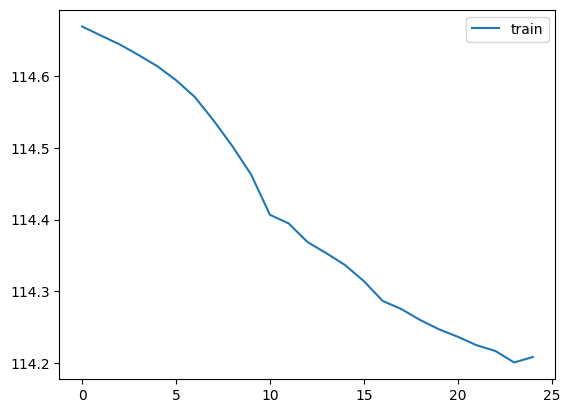

In [34]:
print('Finished Training')

# Plot the training losses
plt.plot(train_losses, label='Train')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Losses')
plt.legend()
plt.show()


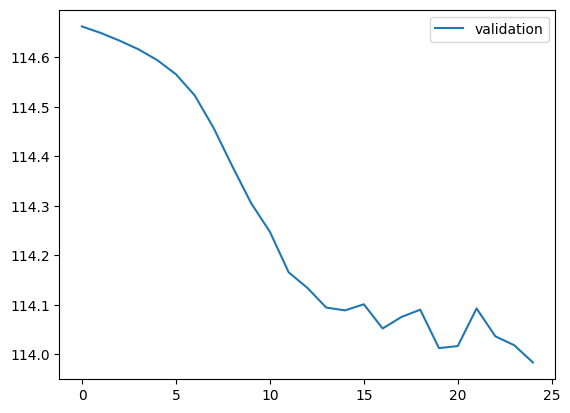

In [35]:
# Plot the validation losses
plt.plot(validation_losses, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Losses')
plt.legend()
plt.show()


In [39]:
net = net[:-2]

In [41]:
import pandas as pd

In [42]:
def make_data(dataloader):
    """
    Generate features and labels from a dataloader.

    Args:
        dataloader: DataLoader containing the dataset.

    Returns:
        tuple: Tuple containing a list of features and a list of labels.
    """
    train_features, train_labels = [], []
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            output = net(images)
            train_features.extend(output.cpu().numpy())
            train_labels.extend(labels.cpu().numpy())
    return train_features, train_labels


In [43]:
device1 = torch.device('cpu')

In [44]:
train_features,train_labels = make_data(trainloader)

/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

In [45]:
test_features,test_labels = make_data(testloader)

/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/root/.cache/torch/hub/pytorch_vision_v0.6.0/torchvision/transforms/functional.py:74: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/tmp/ipykernel_34/837385385.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. P

In [47]:
training_data = [t.to(device1).numpy() for t in train_features]
labels = [t.to(device1).numpy() for t in train_labels]
testing_data = [t.to(device1).numpy() for t in train_features]
test_labels = [t.to(device1).numpy() for t in train_labels]

In [48]:
training_data,labels = pd.DataFrame(training_data),pd.DataFrame(labels)

In [49]:
testing_data,testing_labels = pd.DataFrame(testing_data),pd.DataFrame(test_labels)

In [50]:
training_data.to_csv('./training_data.csv',index=False)
labels.to_csv('./labels.csv',index=False)
testing_data.to_csv('./testing_data.csv',index=False)
testing_labels.to_csv('./test_labels.csv',index=False)

In [51]:
train = pd.concat([training_data,testing_data])
y = pd.concat([labels,testing_labels])

In [52]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train,y,shuffle=True,random_state=2021,test_size=0.1)

In [53]:
from sklearn.svm import SVC

# Initialize the Support Vector Classifier with a linear kernel
svc = SVC(kernel='linear')

# Train the SVC model on the training data
svc.fit(X_train, y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [54]:
from sklearn.metrics import accuracy_score

# Predict the labels of the test data using the trained SVC model
y_pred = svc.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


0.3104575163398693


In [55]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model with specified parameters
lr = LogisticRegression(max_iter=1000, penalty='l2', solver='saga', l1_ratio=0)

# Train the logistic regression model on the training data
lr.fit(X_train, y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(l1_ratio=0, max_iter=1000)

In [56]:
from sklearn.metrics import accuracy_score

# Predict the labels of the test data using the trained logistic regression model
y_pred = lr.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


0.20098039215686275


In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN classifier (specify the number of neighbors, e.g., 5)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier using your training data
knn.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_knn = knn.predict(X_test)

# Calculate and print the accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy score for KNN:", accuracy_knn)


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score for KNN: 0.15196078431372548


In [62]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the XGBoost classifier using your training data
xgb_classifier.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate and print the accuracy score
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy score for XGBoost:", accuracy_xgb)


Accuracy score for XGBoost: 0.6797385620915033
